# Машинное обучение, ФКН ВШЭ

# Практическое задание 7. Бустинговое

## Общая информация

Дата выдачи: 06.12.2021

Мягкий дедлайн: 18.12.2021 23:59 MSK

Жёсткий дедлайн: 19.12.2021 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-07-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [2]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустинга (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

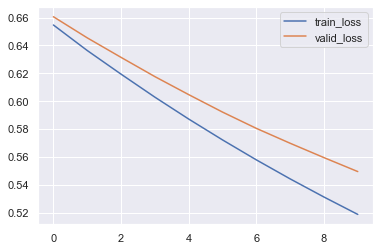

In [4]:
from boosting import Boosting
boosting = Boosting(plot=True)
boosting.fit(x_train, y_train, x_valid, y_valid)

In [5]:
boosting.predict_proba(x_train)[:5]

array([[0.37999873, 0.62000127],
       [0.38042972, 0.61957028],
       [0.61956504, 0.38043496],
       [0.59783972, 0.40216028],
       [0.4222715 , 0.5777285 ]])

In [6]:
y_train[:5]

array([ 1,  1, -1, -1,  1], dtype=int64)

Легко видеть, что в векторе первый элемент соответствует классу -1, второй элемент - классу 1

In [7]:
boosting.history['valid']

[0.6605445298254784,
 0.6454096291369213,
 0.6314085396704101,
 0.6176194412360013,
 0.604700826118022,
 0.5921845158501714,
 0.5805092463360612,
 0.5698283667127707,
 0.5595295426585928,
 0.5495189116128174]

In [8]:
%load_ext autoreload

In [9]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [10]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

Wall time: 1.18 s
Train ROC-AUC 0.9890
Valid ROC-AUC 0.9125
Test ROC-AUC 0.9085


## Задание 2. Обучение градиентного бустинга (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

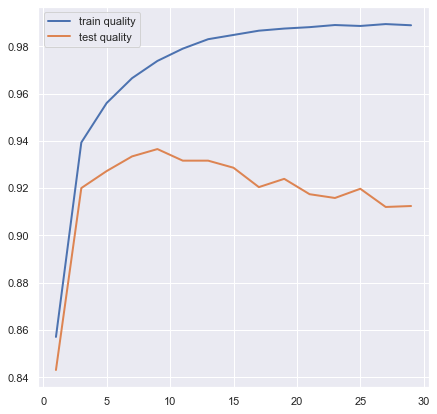

In [11]:
depths = range(1, 30, 2)
train_roc_aucs = []
test_roc_aucs = []

for depth in depths:
    boosting = Boosting()
    boosting.base_model_params = {'max_depth': depth}
    boosting.fit(x_train, y_train, x_valid, y_valid)
    train_roc_aucs.append(round(boosting.score(x_train, y_train),4))
    test_roc_aucs.append(round(boosting.score(x_test, y_test),4))
plt.figure(figsize=(7, 7))
plt.plot(depths, train_roc_aucs, label='train quality', linewidth=2)
plt.plot(depths, test_roc_aucs, label='test quality', linewidth=2)
plt.legend()

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (2 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей.

In [12]:
import itertools as it
from tqdm import tqdm

parameters_boosting = {
    'n_estimators':np.arange(16, 30, 2),
    'learning_rate':np.arange(0.2, 0.4, 0.1),
    'subsample':np.arange(0.2, 0.5, 0.1),
    'early_stopping_rounds':np.arange(120,150,10)
}

def find_best_params(parameters,x_train, y_train, x_valid, y_valid, for_boosting = True, boosting_best = None):
    best_roc_auc_score = 0
    save_model = None
    all_params = sorted(parameters)
    combinations = it.product(*(parameters[param] for param in all_params))
    for comb in tqdm(list(combinations)):
        if for_boosting:
            boosting = Boosting(**dict(zip(all_params, comb)))
        else:
            boosting = boosting_best
            boosting.base_model_params = dict(zip(all_params, comb))
        boosting.fit(x_train, y_train, x_valid, y_valid)
        tmp = round(boosting.score(x_valid, y_valid),4)
        if tmp > best_roc_auc_score:
            best_roc_auc_score = tmp
            save_model = boosting
    return save_model, best_roc_auc_score

best_model, best_roc_auc_score = find_best_params(parameters_boosting, x_train, y_train, x_valid, y_valid)
print(f'Best roc auc score: {best_roc_auc_score}')
print(
    f'Best n_estimators: {best_model.n_estimators}\n',
    f'Best learning_rate: {best_model.learning_rate}\n',
    f'Best subsample: {best_model.subsample}\n',
    f'Best early_stopping_rounds: {best_model.early_stopping_rounds}\n'
)

100%|████████████████████████████████████████████████████████████████████████████████| 126/126 [06:57<00:00,  3.31s/it]

Best roc auc score: 0.9277
Best n_estimators: 28
 Best learning_rate: 0.2
 Best subsample: 0.2
 Best early_stopping_rounds: 140



In [13]:
parameters_tree = {
    'max_depth':np.arange(10, 40, 2),
    'min_samples_leaf':np.arange(1,5,1),
    'min_samples_split':np.arange(2,14,2)
}

boosting = Boosting(
    n_estimators=best_model.n_estimators,
    learning_rate=best_model.learning_rate,
    subsample=best_model.subsample,
    early_stopping_rounds=best_model.early_stopping_rounds
)

best_model, best_roc_auc_score = find_best_params(parameters_tree, x_train, y_train, x_valid, y_valid, False, boosting)
print(best_model.base_model_params)
print(best_roc_auc_score)

100%|████████████████████████████████████████████████████████████████████████████████| 360/360 [20:21<00:00,  3.39s/it]

{'max_depth': 38, 'min_samples_leaf': 4, 'min_samples_split': 12}
0.9422


## Задание 4. Пробуем разные библиотеки (2 балла)

Выберите себе библиотеку с реализацией градиентного бустинга по вкусу из следующих трёх - [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_intro.html), [LightGBM](https://lightgbm.readthedocs.io/en/latest/Python-Intro.html), [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart). Подберите основные гиперпараметры, постарайтесь добиться наилучшего качества на тестовых данных. Сравните результаты своей реализации с результатами библиотечного бустинга.

In [14]:
from catboost import CatBoostClassifier
from boosting import score

params = {
    'depth':np.arange(2, 10, 2),
    'subsample': np.arange(0.2, 0.5, 0.1),
    'learning_rate': np.arange(0.2, 0.4, 0.1),
    'early_stopping_rounds':np.arange(120,150,10),
    'min_child_samples':np.arange(1,3,1)
}
best_roc_auc_score = 0
save_model = None
all_params = sorted(params)
combinations = it.product(*(params[param] for param in all_params))
for comb in tqdm(list(combinations)):
    model = CatBoostClassifier(loss_function='Logloss', verbose=False,**dict(zip(all_params, comb)))
    model.fit(x_train, y_train)
    tmp = round(score(model, x_test, y_test),4)
    if tmp > best_roc_auc_score:
        best_roc_auc_score = tmp
        save_model = model  
print(f'Best roc auc score: {best_roc_auc_score}')

100%|████████████████████████████████████████████████████████████████████████████████| 144/144 [17:54<00:00,  7.46s/it]

Best roc auc score: 0.9414


### Задание 5 (бонус). Пробуем ещё немножко библиотек (1 балл)

Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/). Сравните полученное качество с вашим ручным перебором. Используйте эту библиотеку чтобы подобрать параметры и для своей реалзиации и для библиотечной.

In [15]:
import sklearn

import optuna

def objective(trial):
    subsample1 = trial.suggest_float('subsample', 0.2, 0.5)
    learning_rate1 = trial.suggest_float('learning_rate', 0.2, 0.5)
    early_stopping_rounds1 = trial.suggest_int('early_stopping_rounds', 120, 150, log=True)
    n_estimators1 = trial.suggest_int('n_estimators', 16, 30, log=True)
    
    max_depth1 = trial.suggest_int('max_depth', 10, 40, log=True)
    min_samples_leaf1 = trial.suggest_int('min_samples_leaf', 1, 5, log=True)
    min_samples_split1 = trial.suggest_int('min_samples_split', 3, 15, log=True)
    
    boosting = Boosting(
        n_estimators=n_estimators1,
        learning_rate=learning_rate1,
        early_stopping_rounds=early_stopping_rounds1,
        subsample=subsample1
    )
    boosting.base_model_params = {
        'max_depth':max_depth1,
        'min_samples_leaf':min_samples_leaf1,
        'min_samples_split':min_samples_split1
    }
    
    boosting.fit(x_train, y_train, x_valid, y_valid)
    return round(boosting.score(x_test, y_test),4)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2022-08-12 17:23:23,882] A new study created in memory with name: no-name-26a48432-bf37-46f5-ab76-ca53cb838323
[I 2022-08-12 17:23:24,904] Trial 0 finished with value: 0.9358 and parameters: {'subsample': 0.3513311256456811, 'learning_rate': 0.4232496320040051, 'early_stopping_rounds': 150, 'n_estimators': 17, 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 4}. Best is trial 0 with value: 0.9358.
[I 2022-08-12 17:23:28,193] Trial 1 finished with value: 0.9265 and parameters: {'subsample': 0.447523414066624, 'learning_rate': 0.38607233549585374, 'early_stopping_rounds': 129, 'n_estimators': 21, 'max_depth': 34, 'min_samples_leaf': 5, 'min_samples_split': 3}. Best is trial 0 with value: 0.9358.
[I 2022-08-12 17:23:29,861] Trial 2 finished with value: 0.9265 and parameters: {'subsample': 0.29102871650028467, 'learning_rate': 0.21970550157386662, 'early_stopping_rounds': 127, 'n_estimators': 17, 'max_depth': 39, 'min_samples_leaf': 3, 'min_samples_split': 5}. Best is trial 

[I 2022-08-12 17:24:09,679] Trial 26 finished with value: 0.9327 and parameters: {'subsample': 0.38686158368702217, 'learning_rate': 0.438117051600416, 'early_stopping_rounds': 129, 'n_estimators': 20, 'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 6}. Best is trial 0 with value: 0.9358.
[I 2022-08-12 17:24:12,070] Trial 27 finished with value: 0.9244 and parameters: {'subsample': 0.37606487895198115, 'learning_rate': 0.40179341502018867, 'early_stopping_rounds': 145, 'n_estimators': 22, 'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 7}. Best is trial 0 with value: 0.9358.
[I 2022-08-12 17:24:13,279] Trial 28 finished with value: 0.9272 and parameters: {'subsample': 0.34324674211967476, 'learning_rate': 0.2910190200075001, 'early_stopping_rounds': 136, 'n_estimators': 16, 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 5}. Best is trial 0 with value: 0.9358.
[I 2022-08-12 17:24:15,151] Trial 29 finished with value: 0.9319 and parameters: {'subsa

[I 2022-08-12 17:24:45,850] Trial 52 finished with value: 0.9373 and parameters: {'subsample': 0.27096051165290175, 'learning_rate': 0.21633531967461642, 'early_stopping_rounds': 131, 'n_estimators': 26, 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 5}. Best is trial 52 with value: 0.9373.
[I 2022-08-12 17:24:47,207] Trial 53 finished with value: 0.9295 and parameters: {'subsample': 0.31515580567730667, 'learning_rate': 0.28073662659015775, 'early_stopping_rounds': 131, 'n_estimators': 23, 'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 4}. Best is trial 52 with value: 0.9373.
[I 2022-08-12 17:24:48,196] Trial 54 finished with value: 0.9365 and parameters: {'subsample': 0.2641972209821428, 'learning_rate': 0.21045536230322573, 'early_stopping_rounds': 123, 'n_estimators': 26, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4}. Best is trial 52 with value: 0.9373.
[I 2022-08-12 17:24:49,162] Trial 55 finished with value: 0.9368 and parameters: {'

[I 2022-08-12 17:25:27,770] Trial 78 finished with value: 0.9347 and parameters: {'subsample': 0.24272691714514102, 'learning_rate': 0.20010751119910447, 'early_stopping_rounds': 125, 'n_estimators': 29, 'max_depth': 23, 'min_samples_leaf': 2, 'min_samples_split': 15}. Best is trial 73 with value: 0.9392.
[I 2022-08-12 17:25:28,967] Trial 79 finished with value: 0.9347 and parameters: {'subsample': 0.25798008100450165, 'learning_rate': 0.24888684549150372, 'early_stopping_rounds': 127, 'n_estimators': 28, 'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 14}. Best is trial 73 with value: 0.9392.
[I 2022-08-12 17:25:31,142] Trial 80 finished with value: 0.9342 and parameters: {'subsample': 0.2512418727100619, 'learning_rate': 0.21901865013063912, 'early_stopping_rounds': 130, 'n_estimators': 29, 'max_depth': 32, 'min_samples_leaf': 2, 'min_samples_split': 13}. Best is trial 73 with value: 0.9392.
[I 2022-08-12 17:25:32,051] Trial 81 finished with value: 0.9334 and parameters:

[I 2022-08-12 17:26:06,049] Trial 104 finished with value: 0.9359 and parameters: {'subsample': 0.2929270139708904, 'learning_rate': 0.21220093922988476, 'early_stopping_rounds': 120, 'n_estimators': 23, 'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 13}. Best is trial 73 with value: 0.9392.
[I 2022-08-12 17:26:07,758] Trial 105 finished with value: 0.9353 and parameters: {'subsample': 0.2390106083324589, 'learning_rate': 0.23075891643271484, 'early_stopping_rounds': 121, 'n_estimators': 24, 'max_depth': 35, 'min_samples_leaf': 2, 'min_samples_split': 15}. Best is trial 73 with value: 0.9392.
[I 2022-08-12 17:26:08,797] Trial 106 finished with value: 0.9348 and parameters: {'subsample': 0.28180947541539975, 'learning_rate': 0.2198195241636935, 'early_stopping_rounds': 120, 'n_estimators': 22, 'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 12}. Best is trial 73 with value: 0.9392.
[I 2022-08-12 17:26:10,146] Trial 107 finished with value: 0.9363 and parameter

[I 2022-08-12 17:26:44,386] Trial 130 finished with value: 0.936 and parameters: {'subsample': 0.24123385795047894, 'learning_rate': 0.2517670426954972, 'early_stopping_rounds': 130, 'n_estimators': 21, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 10}. Best is trial 73 with value: 0.9392.
[I 2022-08-12 17:26:45,215] Trial 131 finished with value: 0.9359 and parameters: {'subsample': 0.27222932705372316, 'learning_rate': 0.2303601270265087, 'early_stopping_rounds': 133, 'n_estimators': 21, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 15}. Best is trial 73 with value: 0.9392.
[I 2022-08-12 17:26:46,645] Trial 132 finished with value: 0.9373 and parameters: {'subsample': 0.2992089807898662, 'learning_rate': 0.21704978852890752, 'early_stopping_rounds': 125, 'n_estimators': 29, 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 9}. Best is trial 73 with value: 0.9392.
[I 2022-08-12 17:26:48,090] Trial 133 finished with value: 0.9335 and parameters:

[I 2022-08-12 17:27:24,455] Trial 156 finished with value: 0.9356 and parameters: {'subsample': 0.3766402201237357, 'learning_rate': 0.34923391607971455, 'early_stopping_rounds': 137, 'n_estimators': 27, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10}. Best is trial 73 with value: 0.9392.
[I 2022-08-12 17:27:26,747] Trial 157 finished with value: 0.9357 and parameters: {'subsample': 0.3926422315421803, 'learning_rate': 0.24317367486648234, 'early_stopping_rounds': 137, 'n_estimators': 29, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 9}. Best is trial 73 with value: 0.9392.
[I 2022-08-12 17:27:29,011] Trial 158 finished with value: 0.9361 and parameters: {'subsample': 0.3844242371704109, 'learning_rate': 0.3131067791066225, 'early_stopping_rounds': 139, 'n_estimators': 27, 'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 8}. Best is trial 73 with value: 0.9392.
[I 2022-08-12 17:27:31,294] Trial 159 finished with value: 0.9379 and parameters: 

[I 2022-08-12 17:28:22,444] Trial 182 finished with value: 0.9336 and parameters: {'subsample': 0.4168383869562301, 'learning_rate': 0.24054014238842986, 'early_stopping_rounds': 128, 'n_estimators': 28, 'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 14}. Best is trial 73 with value: 0.9392.
[I 2022-08-12 17:28:24,426] Trial 183 finished with value: 0.9366 and parameters: {'subsample': 0.4067314280429549, 'learning_rate': 0.23604420064009934, 'early_stopping_rounds': 131, 'n_estimators': 30, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 15}. Best is trial 73 with value: 0.9392.
[I 2022-08-12 17:28:26,329] Trial 184 finished with value: 0.9367 and parameters: {'subsample': 0.3579715704327942, 'learning_rate': 0.2599064891782467, 'early_stopping_rounds': 130, 'n_estimators': 29, 'max_depth': 13, 'min_samples_leaf': 4, 'min_samples_split': 15}. Best is trial 73 with value: 0.9392.
[I 2022-08-12 17:28:28,323] Trial 185 finished with value: 0.9354 and parameters

In [16]:
def objective(trial):
    subsample1 = trial.suggest_float('subsample', 0.2, 0.5)
    learning_rate1 = trial.suggest_float('learning_rate', 0.2, 0.5)
    early_stopping_rounds1 = trial.suggest_int('early_stopping_rounds', 120, 150, log=True)
    depth1 = trial.suggest_int('depth', 2, 12, log=True)
    min_child_samples1 = trial.suggest_int('min_child_samples', 1, 5, log=True)
    
    model = CatBoostClassifier(
        loss_function='Logloss',
        verbose=False,
        subsample=subsample1,
        learning_rate=learning_rate1,
        early_stopping_rounds=early_stopping_rounds1,
        depth=depth1,
        min_child_samples=min_child_samples1
    )
    model.fit(x_train, y_train)
    
    return round(score(model, x_test, y_test),4)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2022-08-12 17:28:57,665] A new study created in memory with name: no-name-7b246384-4f3d-4a1d-837b-628a9f81addf
[I 2022-08-12 17:29:03,884] Trial 0 finished with value: 0.9414 and parameters: {'subsample': 0.3245103883683401, 'learning_rate': 0.25606169191791583, 'early_stopping_rounds': 125, 'depth': 2, 'min_child_samples': 1}. Best is trial 0 with value: 0.9414.
[I 2022-08-12 17:29:10,420] Trial 1 finished with value: 0.9404 and parameters: {'subsample': 0.41617875621250666, 'learning_rate': 0.48109375722531467, 'early_stopping_rounds': 149, 'depth': 3, 'min_child_samples': 1}. Best is trial 0 with value: 0.9414.
[I 2022-08-12 17:29:16,997] Trial 2 finished with value: 0.9408 and parameters: {'subsample': 0.40115134896234605, 'learning_rate': 0.25759807820395086, 'early_stopping_rounds': 124, 'depth': 2, 'min_child_samples': 2}. Best is trial 0 with value: 0.9414.
[I 2022-08-12 17:29:23,910] Trial 3 finished with value: 0.9409 and parameters: {'subsample': 0.3032517627076372, 'lear

[I 2022-08-12 17:35:49,491] Trial 30 finished with value: 0.9402 and parameters: {'subsample': 0.2021965826536682, 'learning_rate': 0.3458447211140394, 'early_stopping_rounds': 135, 'depth': 3, 'min_child_samples': 5}. Best is trial 29 with value: 0.942.
[I 2022-08-12 17:35:56,286] Trial 31 finished with value: 0.9398 and parameters: {'subsample': 0.23873267801032563, 'learning_rate': 0.2961900274649773, 'early_stopping_rounds': 131, 'depth': 3, 'min_child_samples': 4}. Best is trial 29 with value: 0.942.
[I 2022-08-12 17:36:03,539] Trial 32 finished with value: 0.9389 and parameters: {'subsample': 0.25248324574515024, 'learning_rate': 0.2987150758430706, 'early_stopping_rounds': 129, 'depth': 4, 'min_child_samples': 3}. Best is trial 29 with value: 0.942.
[I 2022-08-12 17:36:10,135] Trial 33 finished with value: 0.9409 and parameters: {'subsample': 0.4089836540691648, 'learning_rate': 0.26261449948343635, 'early_stopping_rounds': 126, 'depth': 2, 'min_child_samples': 4}. Best is trial

[I 2022-08-12 17:40:10,623] Trial 61 finished with value: 0.9418 and parameters: {'subsample': 0.3451257264472934, 'learning_rate': 0.23899609795679477, 'early_stopping_rounds': 122, 'depth': 3, 'min_child_samples': 2}. Best is trial 29 with value: 0.942.
[I 2022-08-12 17:40:18,308] Trial 62 finished with value: 0.942 and parameters: {'subsample': 0.3451644580142749, 'learning_rate': 0.2324094669309045, 'early_stopping_rounds': 122, 'depth': 3, 'min_child_samples': 2}. Best is trial 29 with value: 0.942.
[I 2022-08-12 17:40:27,025] Trial 63 finished with value: 0.9409 and parameters: {'subsample': 0.3450511011454832, 'learning_rate': 0.2004382043058689, 'early_stopping_rounds': 121, 'depth': 4, 'min_child_samples': 2}. Best is trial 29 with value: 0.942.
[I 2022-08-12 17:40:34,868] Trial 64 finished with value: 0.9409 and parameters: {'subsample': 0.38869485252015246, 'learning_rate': 0.26018952348841884, 'early_stopping_rounds': 123, 'depth': 3, 'min_child_samples': 2}. Best is trial 

[I 2022-08-12 17:45:08,892] Trial 92 finished with value: 0.9411 and parameters: {'subsample': 0.32395555934873693, 'learning_rate': 0.23665621430245487, 'early_stopping_rounds': 120, 'depth': 3, 'min_child_samples': 5}. Best is trial 81 with value: 0.9421.
[I 2022-08-12 17:45:16,068] Trial 93 finished with value: 0.9414 and parameters: {'subsample': 0.3079695796142251, 'learning_rate': 0.2299530276894284, 'early_stopping_rounds': 145, 'depth': 3, 'min_child_samples': 3}. Best is trial 81 with value: 0.9421.
[I 2022-08-12 17:45:23,855] Trial 94 finished with value: 0.9397 and parameters: {'subsample': 0.33826694070867874, 'learning_rate': 0.3029421077499097, 'early_stopping_rounds': 142, 'depth': 4, 'min_child_samples': 3}. Best is trial 81 with value: 0.9421.
[I 2022-08-12 17:45:32,461] Trial 95 finished with value: 0.9386 and parameters: {'subsample': 0.39444032810496615, 'learning_rate': 0.24700067213669608, 'early_stopping_rounds': 123, 'depth': 5, 'min_child_samples': 5}. Best is 

[I 2022-08-12 17:50:30,951] Trial 123 finished with value: 0.9415 and parameters: {'subsample': 0.361940665006403, 'learning_rate': 0.20964831547531576, 'early_stopping_rounds': 126, 'depth': 3, 'min_child_samples': 2}. Best is trial 121 with value: 0.9423.
[I 2022-08-12 17:50:38,192] Trial 124 finished with value: 0.941 and parameters: {'subsample': 0.38830014853528405, 'learning_rate': 0.21460438003616372, 'early_stopping_rounds': 125, 'depth': 3, 'min_child_samples': 2}. Best is trial 121 with value: 0.9423.
[I 2022-08-12 17:50:45,062] Trial 125 finished with value: 0.9411 and parameters: {'subsample': 0.3456394443915499, 'learning_rate': 0.24025394044790702, 'early_stopping_rounds': 122, 'depth': 3, 'min_child_samples': 2}. Best is trial 121 with value: 0.9423.
[I 2022-08-12 17:50:52,052] Trial 126 finished with value: 0.9416 and parameters: {'subsample': 0.36944949254049725, 'learning_rate': 0.23165155440047316, 'early_stopping_rounds': 123, 'depth': 3, 'min_child_samples': 2}. Be

[I 2022-08-12 17:54:52,141] Trial 154 finished with value: 0.9373 and parameters: {'subsample': 0.35555109847145244, 'learning_rate': 0.35698119631058484, 'early_stopping_rounds': 122, 'depth': 6, 'min_child_samples': 2}. Best is trial 121 with value: 0.9423.
[I 2022-08-12 17:54:59,189] Trial 155 finished with value: 0.9412 and parameters: {'subsample': 0.369884420898835, 'learning_rate': 0.20678240247794638, 'early_stopping_rounds': 123, 'depth': 3, 'min_child_samples': 2}. Best is trial 121 with value: 0.9423.
[I 2022-08-12 17:55:06,103] Trial 156 finished with value: 0.9421 and parameters: {'subsample': 0.3360193711842578, 'learning_rate': 0.21575973436748866, 'early_stopping_rounds': 139, 'depth': 3, 'min_child_samples': 4}. Best is trial 121 with value: 0.9423.
[I 2022-08-12 17:55:13,001] Trial 157 finished with value: 0.9415 and parameters: {'subsample': 0.3244167552046578, 'learning_rate': 0.2000476129768175, 'early_stopping_rounds': 136, 'depth': 3, 'min_child_samples': 4}. Bes

[I 2022-08-12 17:58:37,467] Trial 185 finished with value: 0.9414 and parameters: {'subsample': 0.3540190990034664, 'learning_rate': 0.21194967263366016, 'early_stopping_rounds': 125, 'depth': 3, 'min_child_samples': 4}. Best is trial 181 with value: 0.9424.
[I 2022-08-12 17:58:44,270] Trial 186 finished with value: 0.9412 and parameters: {'subsample': 0.36104469330413563, 'learning_rate': 0.21331092864561446, 'early_stopping_rounds': 125, 'depth': 3, 'min_child_samples': 4}. Best is trial 181 with value: 0.9424.
[I 2022-08-12 17:58:51,209] Trial 187 finished with value: 0.941 and parameters: {'subsample': 0.3550857442665373, 'learning_rate': 0.21838224224076244, 'early_stopping_rounds': 127, 'depth': 3, 'min_child_samples': 4}. Best is trial 181 with value: 0.9424.
[I 2022-08-12 17:58:58,061] Trial 188 finished with value: 0.9412 and parameters: {'subsample': 0.34845382094966987, 'learning_rate': 0.20573593247834632, 'early_stopping_rounds': 123, 'depth': 3, 'min_child_samples': 4}. B

## Задание 6. Интерпретация бустингового (1 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга (из тех, что используют вашу реализацию).
Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регресии, сравните их между собой. Проанализируйте полученные результаты.

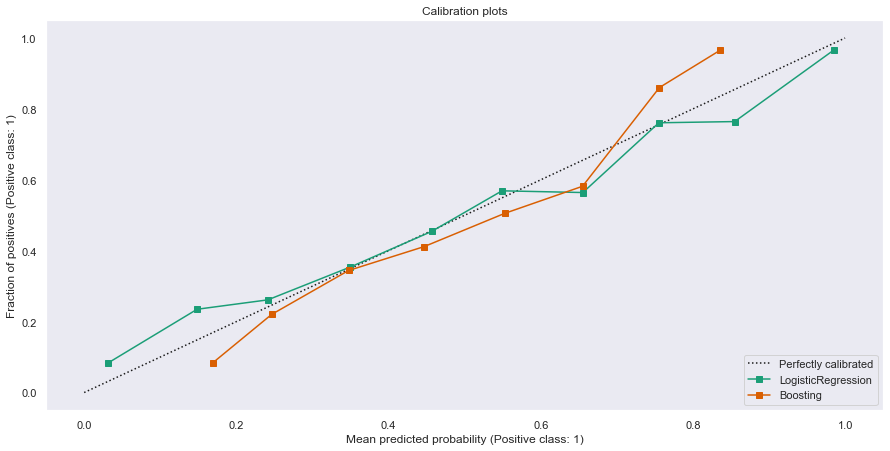

In [27]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.calibration import CalibrationDisplay
from sklearn.linear_model import LogisticRegression

fig = plt.figure(figsize=(15, 15))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

lr = LogisticRegression()
boosting = Boosting(n_estimators=28,learning_rate=0.2,subsample=0.2,early_stopping_rounds=140)
boosting.base_model_params = {'max_depth': 38, 'min_samples_leaf': 4, 'min_samples_split': 12}

ax_calibration_curve = fig.add_subplot(gs[:2, :2])

lr.fit(x_train, y_train)
display = CalibrationDisplay.from_estimator(
    lr,
    x_test,
    y_test,
    n_bins=10,
    name='LogisticRegression',
    ax=ax_calibration_curve,
    color=colors(0),
)

boosting.fit(x_train, y_train, x_valid, y_valid)
y_prob = boosting.predict_proba(x_test)[:, 1]
disp = CalibrationDisplay.from_predictions(
    y_test,
    y_prob,
    n_bins=10,
    name='Boosting',
    ax=ax_calibration_curve,
    color=colors(1),
)

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")
plt.show()

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

<BarContainer object of 169 artists>

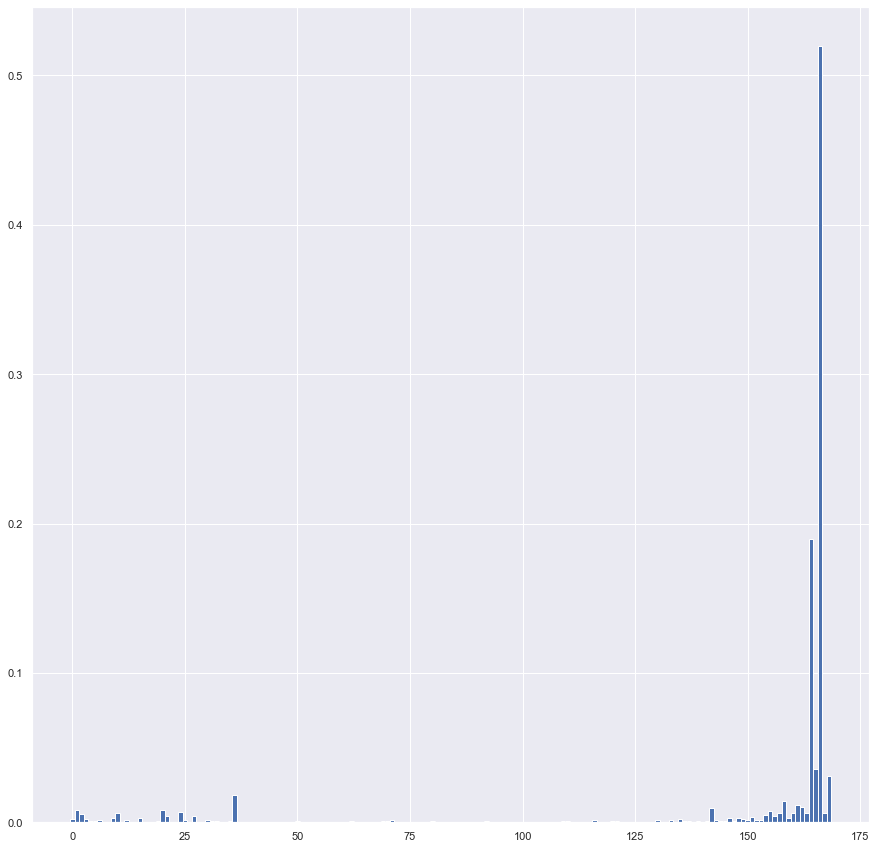

In [28]:
plt.figure(figsize=(15, 15))
plt.bar(range(169), boosting.feature_importances_,width=1)

<BarContainer object of 169 artists>

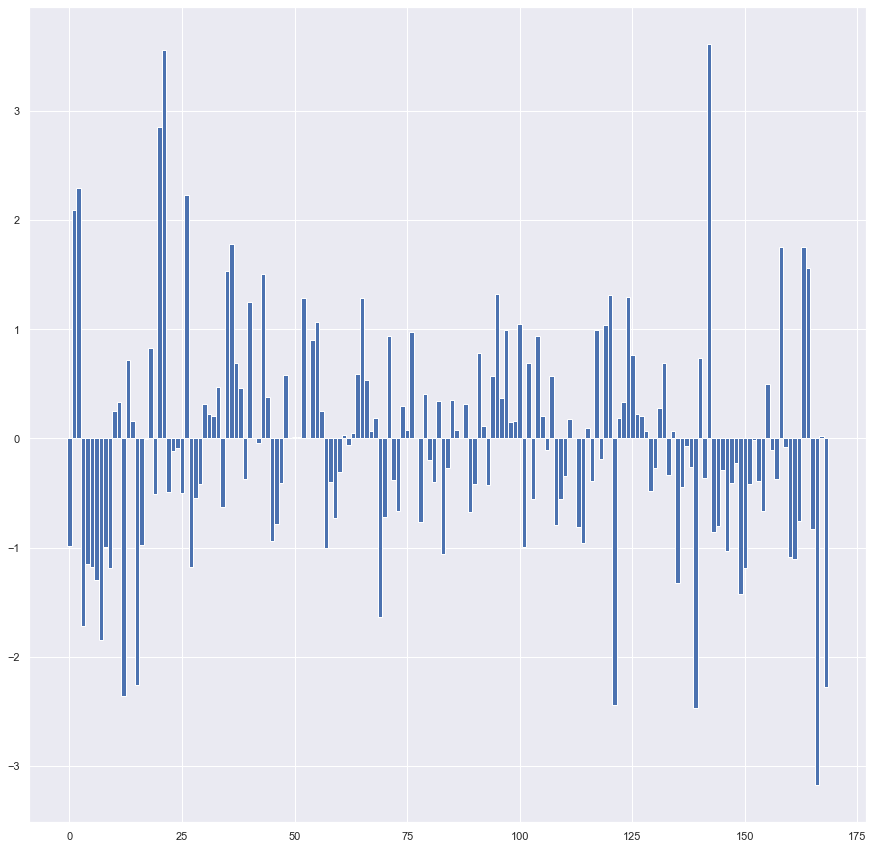

In [29]:
plt.figure(figsize=(15, 15))
plt.bar(range(169), lr.coef_[0],width=1)

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

0.0061419076988727915


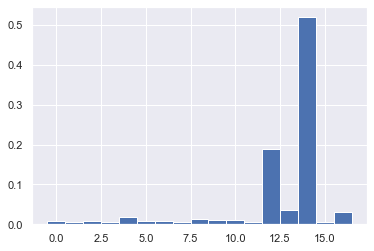

In [30]:
tmp = boosting.feature_importances_
tmp = tmp[tmp > np.quantile(tmp, 0.9)]
plt.bar(range(len(tmp)), tmp,width=1)
print(min(tmp))

In [31]:
boosting = Boosting(n_estimators=24,learning_rate=0.2,subsample=0.2,early_stopping_rounds=140)
boosting.base_model_params = {'max_depth': 38, 'min_samples_leaf': 4, 'min_samples_split': 12}
boosting.fit(x_train, y_train, x_valid, y_valid)


mask = boosting.feature_importances_ > np.quantile(boosting.feature_importances_, 0.9)

boosting = Boosting(n_estimators=24,learning_rate=0.2,subsample=0.2,early_stopping_rounds=140)
boosting.base_model_params = {'max_depth': 38, 'min_samples_leaf': 4, 'min_samples_split': 12}
boosting.fit(x_train[:, mask], y_train, x_valid[:, mask], y_valid)
round(boosting.score(x_test[:, mask], y_test), 4)

0.9322

## Задание 7 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашими лучшими моделями (ваша реализация с лучшими гиперпараметрами + все модели из библиотек с лучшими гиперпараметрами). Улучшилось ли качество?

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def fit_ensemble(models, x_train, x_valid, y_train, y_valid):
    meta_X = list()
    for name, model in models:
        if name == 'boosting':
            model.fit(x_train, y_train, x_valid, y_valid)
        else:
            model.fit(x_train, y_train)
        yhat = model.predict(x_valid)
        yhat = yhat.reshape(len(yhat), 1)
        meta_X.append(yhat)
    meta_X = np.hstack(meta_X)
    blender = LogisticRegression()
    blender.fit(meta_X, y_valid)
    return blender

def score_ensemble(models, blender, x_test, y_test):
    meta_X = list()
    for name, model in models:
        yhat = model.predict(x_test)
        yhat = yhat.reshape(len(yhat), 1)
        meta_X.append(yhat)
    meta_X = np.hstack(meta_X)
    return roc_auc_score(y_test == 1, blender.predict_proba(meta_X)[:, 1])

In [32]:
models = list()

boosting = Boosting(
    n_estimators=28,
    learning_rate=0.2,
    subsample=0.2,
    early_stopping_rounds=140
)
boosting.base_model_params = {'max_depth': 38, 'min_samples_leaf': 4, 'min_samples_split': 12}
models.append(('boosting', boosting))

models.append(('catboost', CatBoostClassifier(
    loss_function='Logloss',
    verbose=False,
    subsample=0.21580906970251676,
    learning_rate=0.2179719584149483,
    early_stopping_rounds=127,
    depth=3,
    min_child_samples=3
)))

blender = fit_ensemble(models, x_train, x_valid, y_train, y_valid)
round(score_ensemble(models, blender, x_test, y_test), 4)

0.8709

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2022 года?